In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['xtick.major.pad']='17'
plt.rcParams["axes.axisbelow"] = False
matplotlib.rc('axes',edgecolor='w')
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [4]:
df = pd.read_csv(r'C:\Users\PETE\Desktop\ADMIN\CAPSTONE\MODEL\archive\imputed_Bangalore_1990_2022_BangaloreCity.csv')

In [5]:
df = df[['tmax' , 'time']]
df['time'] = pd.to_datetime(df['time'],errors='raise')

C:\Users\PETE\AppData\Local\Temp\ipykernel_29364\1099761932.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['time'] = pd.to_datetime(df['time'],errors='raise')


In [6]:
df.head(1)

,tmax,time
0,28.4,1990-01-01


In [7]:
daterange = np.arange('1990-01-01','2022-07-25',dtype='datetime64[7D]') 

In [8]:

dayoftheyear = pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).dayofyear 

activeyear = pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).year # extract year

In [9]:
df = df[df['time'] < '2023-1-1']
dfx = df.to_xarray()

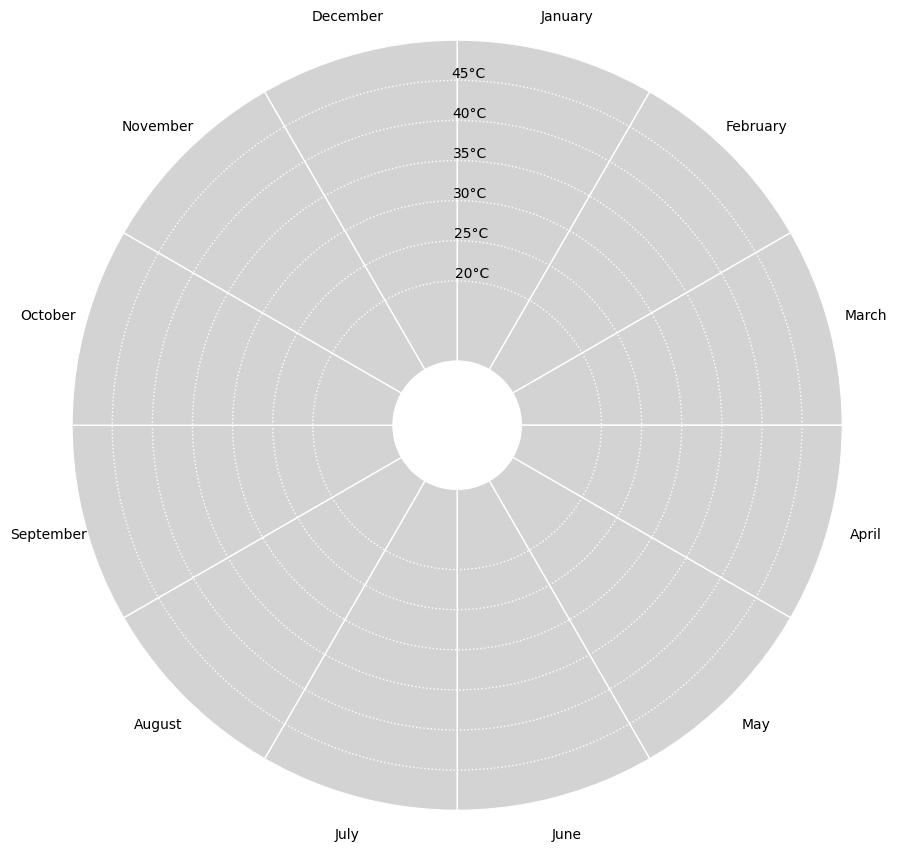

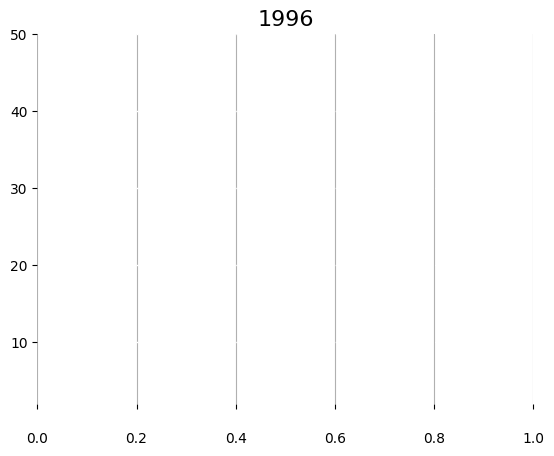

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

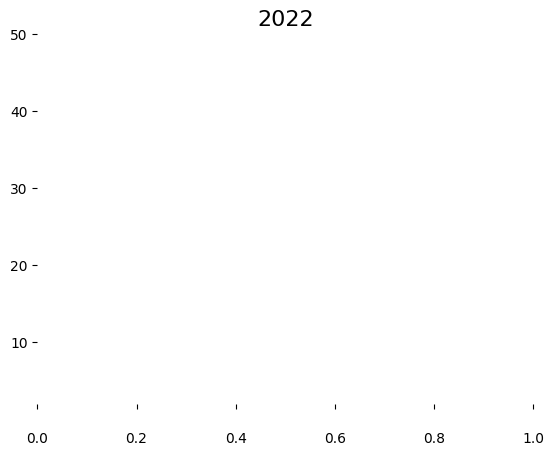

In [11]:

temp = np.zeros(len(daterange))

for i in range(len(daterange)):
    i1=(dfx['time']>=daterange[i])&(dfx['time']<daterange[i]+7)    
    # i2=(df2['TIME']>=daterange[i])&(df2['TIME']<daterange[i]+7)    
    temp[i]=dfx.where(i1,drop=True)['tmax'].max().values
    # t1000[i]=df2.where(i2,drop=True)['TEMP'].mean().values


d = {'date': np.array(daterange,dtype='datetime64[D]'), 'tmax': temp}
ndf = pd.DataFrame(data=d)
ndf.head()

ndf.shape

import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['xtick.major.pad']='17'
plt.rcParams["axes.axisbelow"] = False
matplotlib.rc('axes',edgecolor='w')
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

big_angle= 360/12  # How we split our polar space

date_angle=((360/365)*dayoftheyear)*np.pi/180  # For a day, a corresponding angle

# inner and outer ring limit values

inner=10
outer=50
# setting our color values

ocean_color = ["#ff7f50","#004752"]

def dress_axes(ax):
    ax.set_facecolor('w')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # Here is how we position the months labels

    middles=np.arange(big_angle/2 ,360, big_angle)*np.pi/180
    ax.set_xticks(middles)
    ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'])
    ax.set_yticks([20,25,30,35,40,45])
    ax.set_yticklabels(['20°C','25°C','30°C','35°C','40°C','45°C'])
    # Changing radial ticks angle

    ax.set_rlabel_position(359)
    ax.tick_params(axis='both',color='w')
    plt.grid(None,axis='x')
    plt.grid(axis='y',color='w', linestyle=':', linewidth=1)    
    # Here is the bar plot that we use as background

    bars = ax.bar(middles, outer, width=big_angle*np.pi/180, bottom=inner, color='lightgray', edgecolor='w',zorder=0)
    plt.ylim([2,outer])
    # Custom legend

    # legend_elements = [Line2D([0], [0], marker='o', color='w', label='Surface', markerfacecolor=ocean_color[0], markersize=15),
    #                    Line2D([0], [0], marker='o', color='w', label='1000m', markerfacecolor=ocean_color[1], markersize=15),
    #                    ]
    # ax.legend(handles=legend_elements, loc='center', fontsize=13, frameon=False)
    # Main title for the figure

    # plt.suptitle('Adilabad',fontsize=16,horizontalalignment='center')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
dress_axes(ax)
plt.show()

def draw_data(i):       
    # Clear

    ax.cla()
    # Redressing axes

    dress_axes(ax)
    # Limit between thin lines and thick line, this is current date minus 51 weeks basically.

    # why 51 and not 52 ? That create a small gap before the current date, which is prettier

    i0=np.max([i-51,0])

    ax.plot(date_angle[i0:i+1], ndf['tmax'][i0:i+1],'-',color=ocean_color[0],alpha=1.0,linewidth=5)     
    ax.plot(date_angle[0:i+1], ndf['tmax'][0:i+1],'-',color=ocean_color[0],linewidth=0.7)     

    # ax.plot(date_angle[i0:i+1], ndf['t1000'][i0:i+1],'-',color=ocean_color[1],alpha=1.0,linewidth=5)     
    # ax.plot(date_angle[0:i+1], ndf['t1000'][0:i+1],'-',color=ocean_color[1],linewidth=0.7)     

    # Plotting a line to spot the current date easily

    ax.plot([date_angle[i],date_angle[i]],[inner,outer],'k-',linewidth=0.5)
    # Display the current year as a title, just beneath the suptitle

    plt.title(str(activeyear[i]),fontsize=16,horizontalalignment='center')

# Test it

draw_data(322)
plt.show()

anim = FuncAnimation(fig, draw_data, interval=40, frames=len(daterange)-6, repeat=False)    
#anim.save('ArgopyUseCase_MedTempAnimation.mp4')   
anim_obj  = anim.to_html5_video()

activeyear.shape

daterange.shape

# anim.save('mean_temp_1.mp4')   


In [ ]:
def prophet_AQI(city):

  data = pd.read_csv('{}_aqi_csv.csv'.format(city))


  data['time'] = pd.to_datetime(data['dt'], dayfirst=True)
  data['aqi'] = data['aqi'].interpolate(method='linear')
  data_prophet = data[['time', 'aqi']].rename(columns={'time': 'ds', 'aqi': 'y'})

  split_date = '2022-01-01'
  train = data_prophet[data_prophet['ds'] < split_date]
  test = data_prophet[data_prophet['ds'] >= split_date]

  model_optimized = Prophet(
      changepoint_prior_scale=0.01,
      seasonality_prior_scale=1.0,
  )
  model_optimized.fit(data_prophet)



  future = model_optimized.make_future_dataframe(periods=365) # horizon
  future['yearly'] = future['ds'].apply(lambda x: x.year - 1) # addition
  forecast = model_optimized.predict(future)
  with open('./{}_model.json'.format(city), 'w') as fout:
      fout.write(model_to_json(model_optimized))  # Save model
  print("model saved")
  forecast.to_csv('./{}_csv.csv'.format(city), index=False)
  print("prediction file saved")

In [5]:
import pickle as pk 
import ffmpeg

In [6]:
df1 = pk.load(open('save1.p', 'rb'))
df2 = pk.load(open('save2.p', 'rb'))
# df2 = pk.load('save2.p', 'rb')

In [7]:
import pandas as pd
import numpy as np
# from argopy import DataFetcher as ArgoDataFetcher
# argo_loader = ArgoDataFetcher(cache=True)
# #

# Query surface and 1000m temp in Med sea with argopy

# df1 = argo_loader.region([-1.2,29.,28.,46.,0,10.,'2009-12','2020-01']).to_xarray()
# df2 = argo_loader.region([-1.2,29.,28.,46.,975.,1025.,'2009-12','2020-01']).to_xarray()
#


# pickle.dump( df1, open( "save1.p", "wb" ) )
# pickle.dump( df2, open( "save2.p", "wb" ) )

# Weekly date array

daterange=np.arange('2010-01-01','2020-01-03',dtype='datetime64[7D]') 
dayoftheyear=pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).dayofyear # middle of the week

activeyear=pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).year # extract year


# Init final arrays

tsurf=np.zeros(len(daterange))
t1000=np.zeros(len(daterange))

# Filling arrays

for i in range(len(daterange)):
    i1=(df1['TIME']>=daterange[i])&(df1['TIME']<daterange[i]+7)    
    i2=(df2['TIME']>=daterange[i])&(df2['TIME']<daterange[i]+7)    
    tsurf[i]=df1.where(i1,drop=True)['TEMP'].mean().values
    t1000[i]=df2.where(i2,drop=True)['TEMP'].mean().values

# Creating dataframe    

d = {'date': np.array(daterange,dtype='datetime64[D]'), 'tsurf': tsurf, 't1000': t1000}
ndf = pd.DataFrame(data=d)
ndf.head()


import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['xtick.major.pad']='17'
plt.rcParams["axes.axisbelow"] = False
matplotlib.rc('axes',edgecolor='w')
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

big_angle= 360/12  # How we split our polar space

date_angle=((360/365)*dayoftheyear)*np.pi/180  # For a day, a corresponding angle

# inner and outer ring limit values

inner=10
outer=30
# setting our color values

ocean_color = ["#ff7f50","#004752"]


NameError: name 'big_angle' is not defined

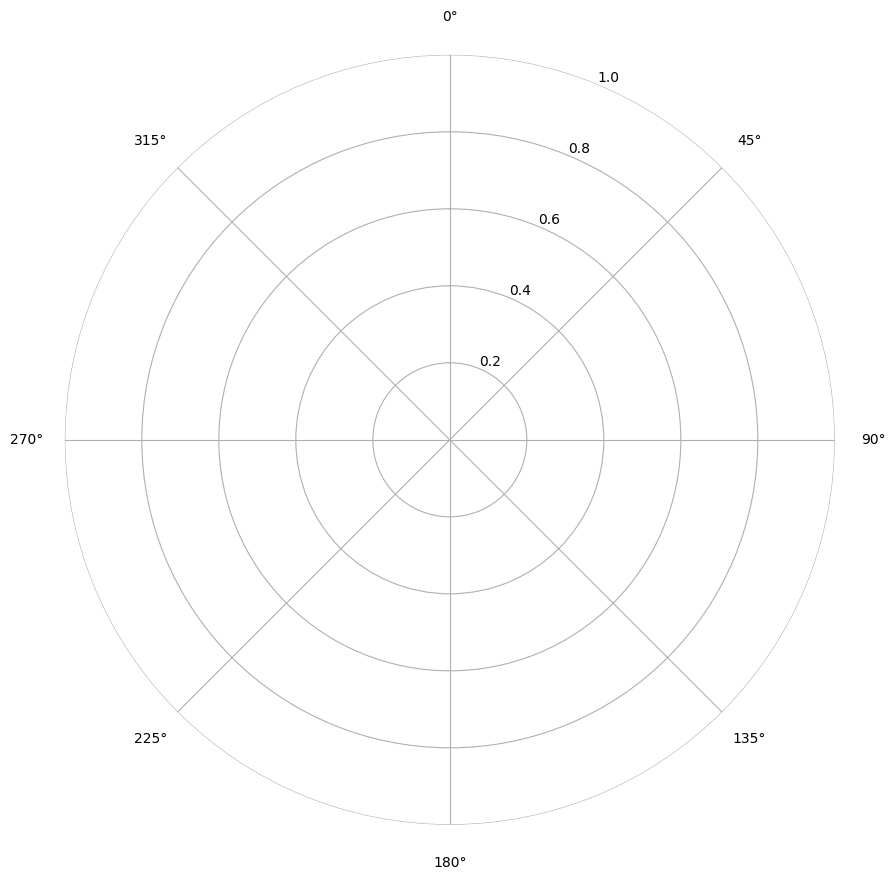

In [28]:

def dress_axes(ax):
    ax.set_facecolor('w')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # Here is how we position the months labels

    middles=np.arange(big_angle/2 ,360, big_angle)*np.pi/180
    ax.set_xticks(middles)
    ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'])
    ax.set_yticks([15,20,25])
    ax.set_yticklabels(['15°C','20°C','25°C'])
    # Changing radial ticks angle

    ax.set_rlabel_position(359)
    ax.tick_params(axis='both',color='w')
    plt.grid(None,axis='x')
    plt.grid(axis='y',color='w', linestyle=':', linewidth=1)    
    # Here is the bar plot that we use as background

    bars = ax.bar(middles, outer, width=big_angle*np.pi/180, bottom=inner, color='lightgray', edgecolor='w',zorder=0)
    plt.ylim([2,outer])
    # Custom legend

    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Surface', markerfacecolor=ocean_color[0], markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='1000m', markerfacecolor=ocean_color[1], markersize=15),
                       ]
    # time_text = ax.text(0.67, 0.9, "0", transform=plt.gcf().transFigure)
    # ax.legend(handles=legend_elements, loc='center', fontsize=13, frameon=False)
    # Main title for the figure

    plt.suptitle('Temprature',fontsize=16,horizontalalignment='center')
    # plt.suptitle(str(activeyear[i]),fontsize=16,horizontalalignment='center')


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
dress_axes(ax)
plt.show()



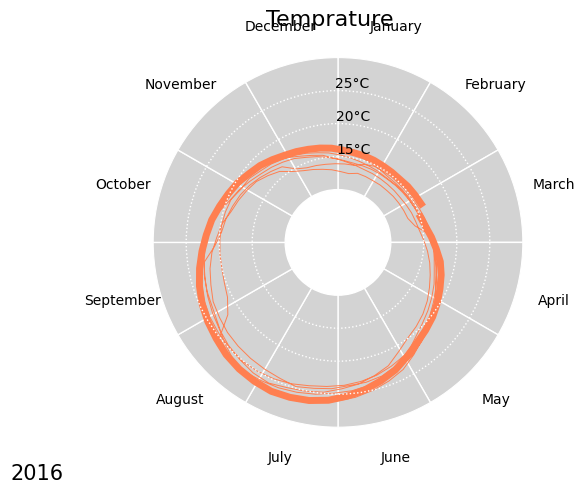

In [12]:

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

def draw_data(i):       
    # Clear

    # ax = plt.subplot(111)

    ax.cla()
    # Redressing axes

    dress_axes(ax)
    # Limit between thin lines and thick line, this is current date minus 51 weeks basically.

    # why 51 and not 52 ? That create a small gap before the current date, which is prettier

    i0=np.max([i-51,0])

    ax.plot(date_angle[i0:i+1], ndf['tsurf'][i0:i+1],'-',color=ocean_color[0],alpha=1.0,linewidth=5)     
    ax.plot(date_angle[0:i+1], ndf['tsurf'][0:i+1],'-',color=ocean_color[0],linewidth=0.7)     

    # ax.plot(date_angle[i0:i+1], ndf['t1000'][i0:i+1],'-',color=ocean_color[1],alpha=1.0,linewidth=5)     
    # ax.plot(date_angle[0:i+1], ndf['t1000'][0:i+1],'-',color=ocean_color[1],linewidth=0.7)     

    # Plotting a line to spot the current date easily

    # ax.plot([date_angle[i],date_angle[i]],[inner,outer],'k-',linewidth=0.5)
    # ax.text(1, 1, activeyear[i], fontsize = 23)
    time_text = ax.text(0, 0, s="0", transform=plt.gcf().transFigure , fontdict={
        
    } , fontsize=15)
    time_text.set_text(activeyear[i])

    # return plt
    # Display the current year as a title, just beneath the suptitle

    # plt.title(str(activeyear[i]),fontsize=16,horizontalalignment='center')
    # plt.suptitle('Temprature',fontsize=16,horizontalalignment='center')
    # plt.suptitle(str(activeyear[i]),fontsize=16,horizontalalignment='center')
# Test it

draw_data(322)
# x.show()

In [13]:

anim = FuncAnimation(fig, draw_data, interval=40, frames=len(daterange)-6, repeat=False)    


C:\Users\PETE\AppData\Roaming\Python\Python311\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [3]:
anim.save('out6.gif')

NameError: name 'anim' is not defined

In [34]:
# ffmpeg -version   


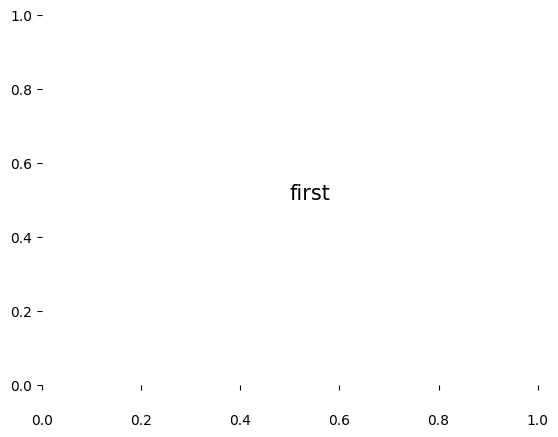

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

times = ['first', 'second', 'third']

time_text = ax.text(.5, .5, '', fontsize=15)


def updatefig(num):
    
    time_text.set_text(times[num])
    return time_text,

anim = FuncAnimation(fig, updatefig, frames=len(times), blit=True)

In [28]:
anim.save('test1.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
